# Classification in Machine Learning

© 2026 Yvan Richard.      
*All rights reserved*

## Foreword

In the previous chapter we discusses *linear regression*, a model used to predict a continuous real valued variable $y$. However, in many machine learning tasks we desire to predict discrete outcomes, classes such as : `['dog', 'cat']`. These *qualitative* variables are often referred to as *categorical* variables. In this notebook, we closelly follow the steps of Hastie et al. (2009) to understand what classification is and how machine learning can help us tackle those tasks.

In [13]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 

## Table of Contents

1. <a href="#part1">Overview & Dataset</a>
2. <a href="#part2">Logistic Regression</a>

## <a id = "part1" style = "color: inherit; ">1. Overview & Dataset</a>

### 1.1. The Classification Settings

The classification is a particular task of supervised learning, and just as in the regression settings, we have a set of predictors $X = \{x_1, x_2, \ldots, x_k\}$ that are leveraged to predict a discrete class $y$ (e.g. `'dog'`, or `'cat'`). With these data, we train different *classifiers* and test them on (unseen) test data to observe the performances of the model. Basically, those classifiers will estimate the following conditional probability: 

$$
P(Y = y^{(i)} \mid X = \{x_1^{(i)}, x_2^{(i)}, \ldots, x_k^{(i)} \})
$$

What is the probability of observing the particular class $y^{(i)}$ knowing the values of each $k$ predictor for this particular observation $x_k^{(i)}$. 
Evidently, the metrics with which we evaluate the classification are different than the regression and will be presented in this notebook. Alongside this notebook, I will rely use a landmark dataset in machine learning for classification tasks: the `Iris` dataset.

### 1.2. A Landmark Dataset in Classification: `Iris`

#### Data Description

The `Iris` dataset is a canonical benchmark for supervised classification, originally collected by Fisher (1936) and still widely used to illustrate core concepts in statistical learning and machine learning. It contains 150 observations of iris flowers drawn from three species (Iris setosa, I. versicolor, and I. virginica), with each observation described by four continuous morphological measurements: sepal length, sepal width, petal length, and petal width. The task is a three-class classification problem in which the species label serves as the target variable. Owing to its low dimensionality, moderate class balance (50 instances per class), and absence of missing values, the dataset provides a clean environment for studying classifiers in controlled settings. Below is the schema of an iris:

<div align = "center">
    <img src = "images/iris-diagram-1.png" width="20%">
</div>

#### Loading the Dataset

Finally, I load the data set again by using the UC Irvine Machine Learning Repository:


In [7]:
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
  
# bind data and targets 
df = pd.concat([X, y], axis=1)

# display first 5 rows
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


We can also inspect the dimensionality of the data set (verify consistency with data description):

In [12]:
# dimensions of the dataset
print("Dataset dimensions:", df.shape)

# value counts of target variable
print("\nSpecies distribution\n", df['class'].value_counts())

Dataset dimensions: (150, 5)

Species distribution
 class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


#### Minimalistic Visualizations

To grasp how the data behave, I realize some visualizations. This section is not a comprehensive EDA of the dataset but merely an exploration of a few patterns in the data.

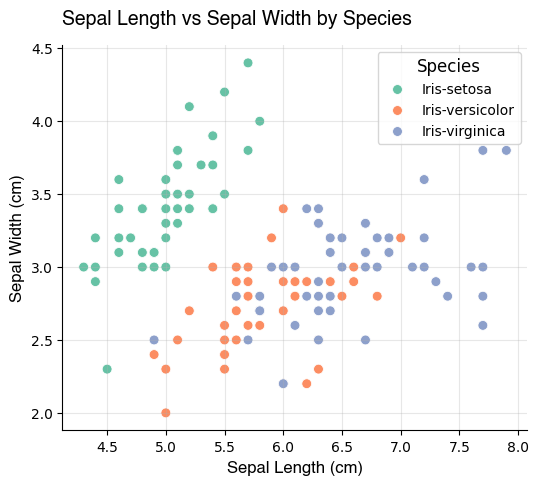

In [35]:
# scatter plot of sepal length vs sepal width colored by species
fig, ax = plt.subplots(figsize=(6,5))
sns.scatterplot(data=df, x='sepal length', y='sepal width',
                hue='class', palette='Set2', s=50, ax=ax)

# aesthetics
ax.set_xlabel('Sepal Length (cm)', fontsize=12, family='Helvetica')
ax.set_ylabel('Sepal Width (cm)', fontsize=12, family='Helvetica')
ax.set_title('Sepal Length vs Sepal Width by Species', fontsize=14,
             family='Helvetica', loc='left', pad = 15)
ax.legend(title='Species', title_fontsize=12, fontsize=10, loc='upper right')
sns.despine()
ax.grid(alpha=0.3)
plt.show()

**Linear Separability**

For instance, in this plot it is really interesting to see that apparently, `Iris-setosa` is *linearily* separable from the two other species in this particular $x, y$ plan. Two classes (e.g. `'setosa'` and `'not setosa'`) are said to be linearily separable if there exists a linear decision boundary (a hyperplane) that separates them perfectly—i.e., all points of one class lie on one side and all points of the other class lie on the other side. (In machine learning the *perfectly* rarely applies but we approach it). However, if we use another $x, y$ plane, we might obtain linear separability for every class:

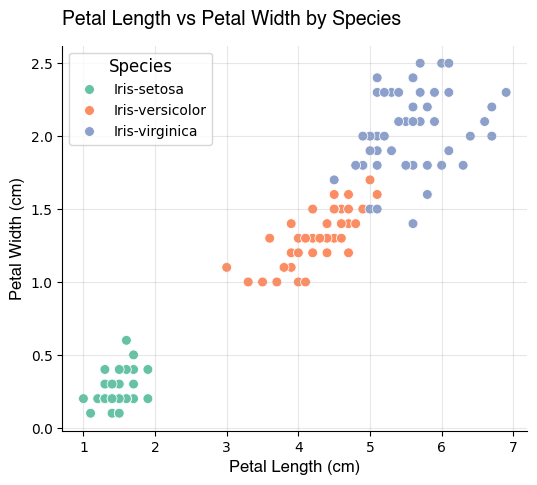

In [37]:
# scatter plot of sepal length vs sepal width colored by species
fig, ax = plt.subplots(figsize=(6,5))
sns.scatterplot(data=df, x='petal length', y='petal width',
                hue='class', palette='Set2', s=50, ax=ax)

# aesthetics
ax.set_xlabel('Petal Length (cm)', fontsize=12, family='Helvetica')
ax.set_ylabel('Petal Width (cm)', fontsize=12, family='Helvetica')
ax.set_title('Petal Length vs Petal Width by Species', fontsize=14,
             family='Helvetica', loc='left', pad = 15)
ax.legend(title='Species', title_fontsize=12, fontsize=10, loc='upper left')
sns.despine()
ax.grid(alpha=0.3)
plt.show()

This dataset is especially nice for this reason, it is very evident to make some patterns emerge in the data, and we feel like we could almost hard-code some rules for classifying the species. However, this will poorly generalize to the real-world. In the next section, we therefore treat the $101$ algorithm for classification: *logistic regression*.

## <a id = "part2" style = "color: inherit; ">2. Logistic Regression</a>

## References

- Fisher, R. A. (1936). The use of multiple measurements in taxonomic problems. *Annals of eugenics*, 7(2), 179-188.
- Hastie, T., Tibshirani, R., & Friedman, J. (2009). *An introduction to statistical learning*.
